# Model Usage Examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

from ldr import LDR

In [2]:
plt.style.use("illumina.mplstyle")

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Remove setosa flowers as am only interested in true or false, drop species as it is the target.

In [4]:
df = df[df["species"] != "setosa"]
targets = df["species"]
df = df.drop(["species"], axis=1)

In [5]:
ldr = LDR(df, targets, "class", "virginica", "versicolor")

Class balance fixed, Negatives: 50 , Positives: 50


In [6]:
# Train classifier and check accuracy.
X_train, X_test, y_train, y_test = train_test_split(
    ldr.scaled, ldr.targets, test_size=0.33, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print("F1 score:", f1_score(y_test, preds, pos_label="virginica"))
print("Confusion matrix:")
print(confusion_matrix(y_test, preds))

F1 score: 0.8461538461538461
Confusion matrix:
[[18  1]
 [ 3 11]]


In [7]:
def clf_func(df):
    proba = clf.predict_proba(df)
    return np.array([i[1] for i in proba])

In [8]:
ldr.density_estimate(clf_func, n=10000)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


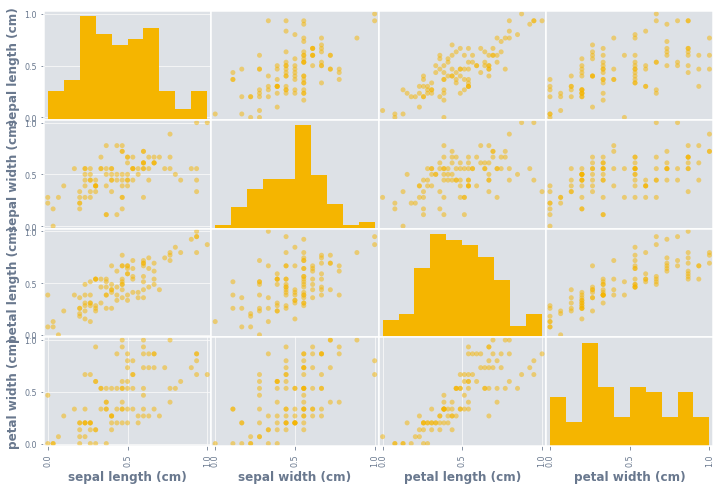

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


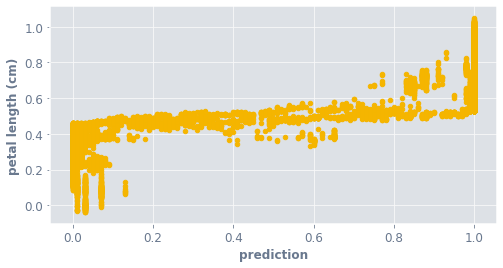

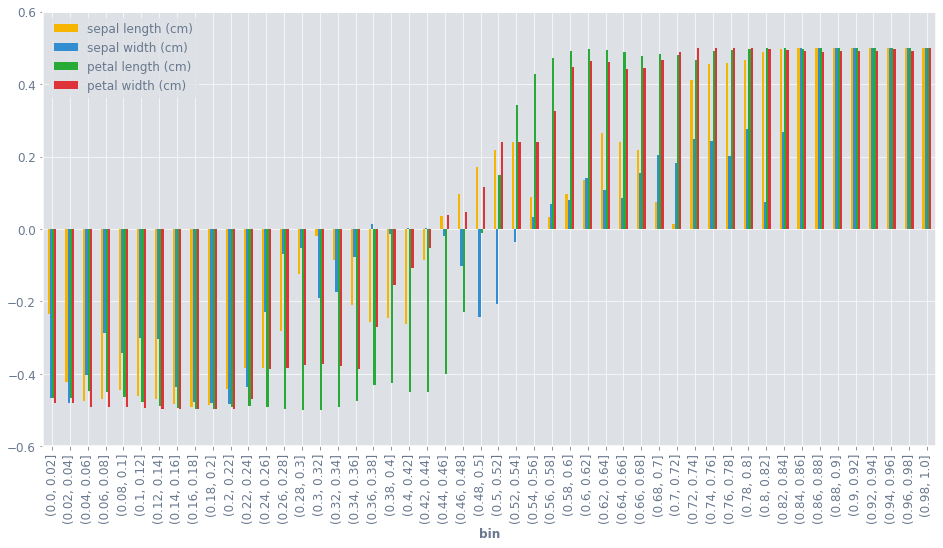

TL: [(3, 1), (2, 1), (2, 2), (1, 1), (1, 2), (1, 3)]
BR: [(2, 3), (3, 3), (3, 2)]
LR: [(0, 1), (0, 2), (0, 3)]
TR: [(1, 0), (2, 0), (3, 0)]
3 1
petal length (cm) petal width (cm)
2 1
sepal width (cm) petal width (cm)
2 2
sepal width (cm) petal length (cm)
1 1
sepal length (cm) petal width (cm)
1 2
sepal length (cm) petal length (cm)
1 3
sepal length (cm) sepal width (cm)
1 0
sepal length (cm)
2 0
sepal width (cm)
3 0
petal length (cm)
0 1
petal width (cm)
0 2
petal length (cm)
0 3
sepal width (cm)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


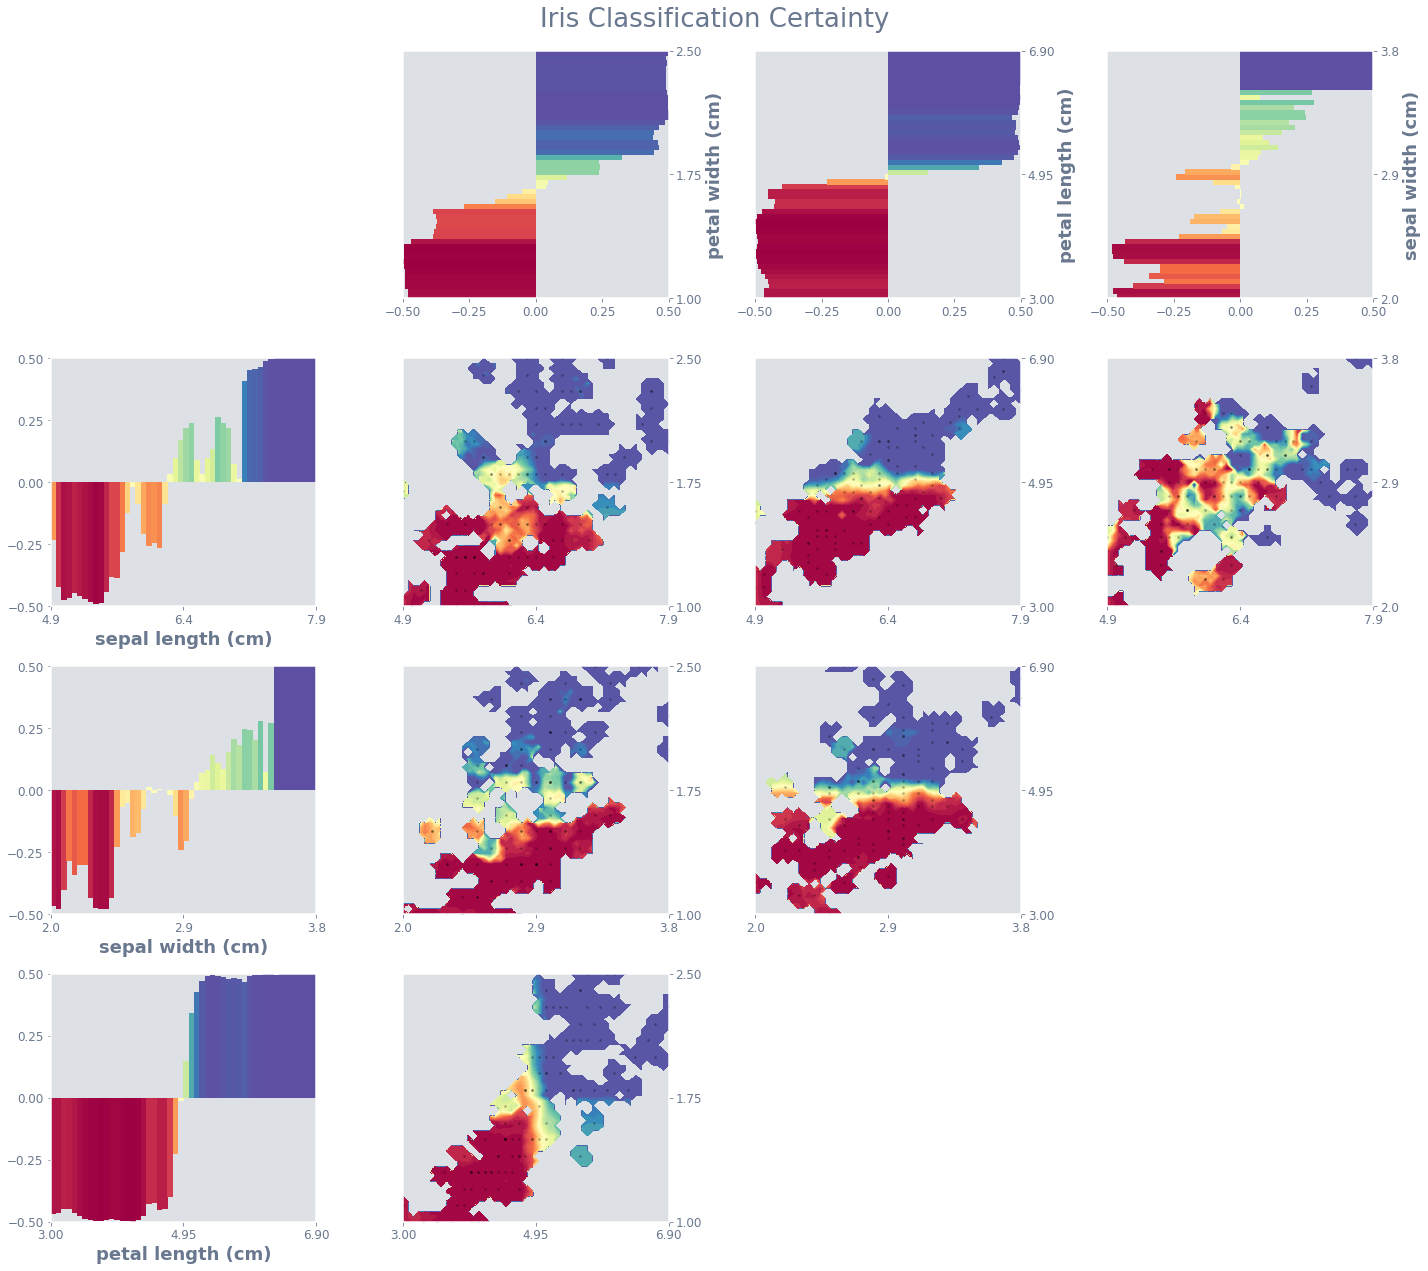

In [9]:
ldr.scatter_plot_matrix()
ldr.density_scatter("petal length (cm)")
ldr.select_bins()
ldr.vis_1d()
ldr.vis_2d(title="Iris Classification Certainty")